# Lecture 11 worksheet

In [123]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.datasets import load_iris

import statsmodels.api as sm
import pymc3 as pm
from pymc3 import glm
import arviz as az

from IPython.display import Image
sns.set(style="dark")
plt.style.use("ggplot")

## Problem 1: Goodness of fit for linear models

### Q1 a)

Based on visually inspecting the following plot, can you tell if the linear model is misspecified?

*Hint: Check out the assumptions of the linear model [here](https://bookdown.org/egarpor/PM-UC3M/lm-i-assumps.html).*

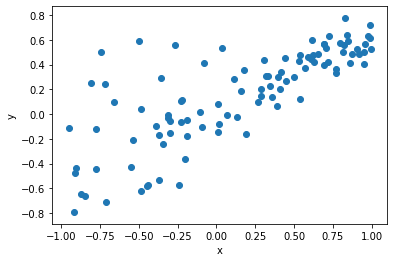

In [27]:
q1a_df = pd.read_csv("q1a.csv", index_col = 0)
plt.scatter(q1a_df["x"], q1a_df["y"])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Q1 b)

We now try to fit a linear model and do a QQ-plot to examine goodness of fit. Briefly read about QQ-plots [here](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot) or your favorite reference.

In [54]:
gaussian_model = sm.GLM(
    q1a_df.y, sm.add_constant(q1a_df.x), 
    family=sm.families.Gaussian()
)
gaussian_results = gaussian_model.fit()
print(gaussian_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                        0.058628
Method:                          IRLS   Log-Likelihood:                0.94306
Date:                Sun, 21 Feb 2021   Deviance:                       5.7456
Time:                        23:35:29   Pearson chi2:                     5.75
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0889      0.025      3.567      0.0

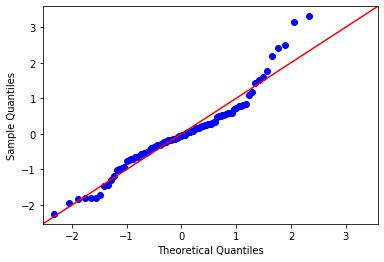

In [55]:
sm.qqplot(gaussian_results.resid_response / np.std(gaussian_results.resid_response), line = "45")
plt.show()

We are comparing the sample distribution of the residuals to the standard normal distribution. What can we say about the goodness-of-fit from this plot? Which assumption of the linear model are we checking?

## Problem 2: Interpreting logistic model

In this problem, we fit a logistic regression model on a subset of the famous [iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) dataset. We have 100 samples of iris flowers, and measure their sepal length, sepal width, petal length and petal width. The response labels are whether they belong to the *Virginica* species (1) or the *Versicolor* species (0).

In [101]:
X, y = load_iris(return_X_y=True)
iris_subset = pd.DataFrame(X[y!=0,:],
                           columns = ["sepal_length", "sepal_width", 
                                      "petal_length", "petal_width"])
y = y[y!=0] - 1
iris_subset["species"] = y

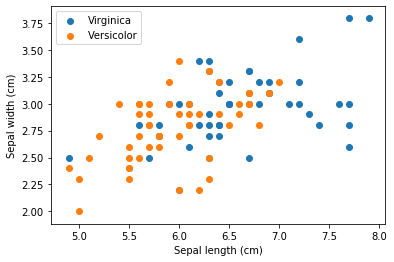

In [91]:
virginica_filter = (y==1)
plt.scatter(iris_subset[virginica_filter]["sepal_length"], 
            iris_subset[virginica_filter]["sepal_width"],
            label = "Virginica")
plt.scatter(iris_subset[~virginica_filter]["sepal_length"], 
            iris_subset[~virginica_filter]["sepal_width"],
            label = "Versicolor")

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.legend()
plt.show()

We fit a model only with the sepal features.

In [99]:
logistic_model = sm.GLM(
    iris_subset["species"], sm.add_constant(iris_subset[["sepal_width", "sepal_length"]]), 
    family=sm.families.Binomial()
)
logistic_results = logistic_model.fit()
print(logistic_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                species   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -55.163
Date:                Mon, 22 Feb 2021   Deviance:                       110.33
Time:                        00:23:04   Pearson chi2:                     100.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -13.0460      3.097     -4.212   

### Q2 a)

Assuming that the model is correct, write in one sentence an interpretation for the logistic model with respect to sepal length.

*Hint: Recall that the logistic model is*

$$\log\left(\frac{p}{1-p}\right) = x^T\beta$$

*where $p$ is the probability of the sample with feature vector $x$ being in class 1. The quantity on the left hand side is called the log odds ratio*.

### Q2 b)

What happens to the interpretation if the model is misspecified?

### Q2 c)

We now also include petal width in our model. Which model has a better fit? How can you tell?

In [102]:
logistic_model = sm.GLM(
    iris_subset["species"], sm.add_constant(iris_subset[["sepal_width", "sepal_length", "petal_width"]]), 
    family=sm.families.Binomial()
)
logistic_results = logistic_model.fit()
print(logistic_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                species   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12.951
Date:                Mon, 22 Feb 2021   Deviance:                       25.902
Time:                        00:23:49   Pearson chi2:                     32.6
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -20.2873      8.055     -2.519   